<a href="https://colab.research.google.com/github/adnanshimul10/Machine_Learning_Project/blob/main/Shopping_Mall_Customers_Segmentation_K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.rename(columns={'Gender': "gender", 'Age':'age', 'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'score'}, inplace = True)
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.isnull().sum()

CustomerID    0
gender        0
age           0
income        0
score         0
dtype: int64

In [5]:
df.describe()

,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


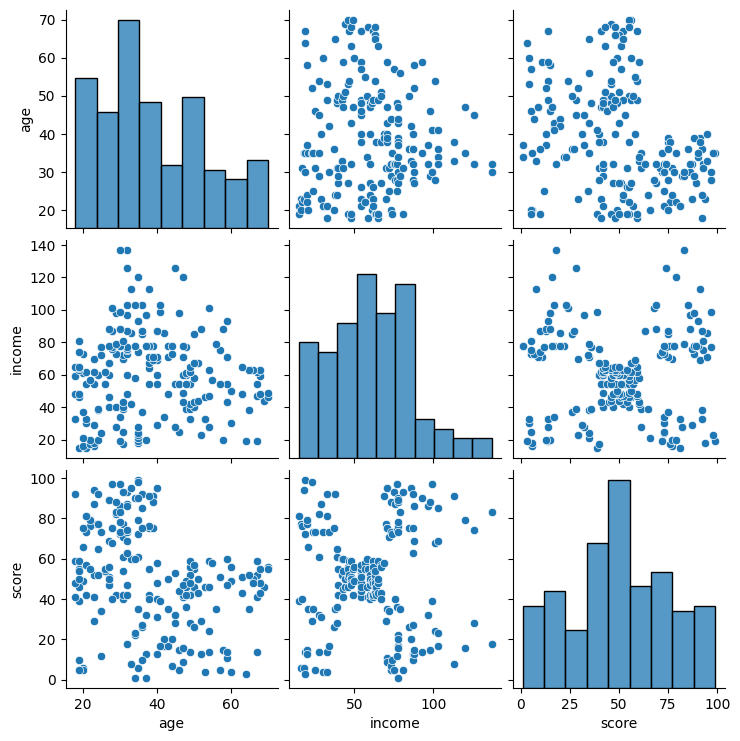

In [6]:
sns.pairplot(df[['age', 'income', 'score']])

In [7]:
import sklearn.cluster as cluster

In [8]:
kmeans = cluster.KMeans(n_clusters=5)

In [9]:
kmeans = kmeans.fit(df[['income', 'score']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [11]:
df['income_cluster'] = kmeans.labels_

In [12]:
df

,CustomerID,gender,age,income,score,income_cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,2
197,198,Male,32,126,74,4
198,199,Male,32,137,18,2


In [13]:
df['income_cluster'].value_counts()

0    81
4    39
2    35
1    23
3    22
Name: income_cluster, dtype: int64

<Axes: xlabel='income', ylabel='score'>

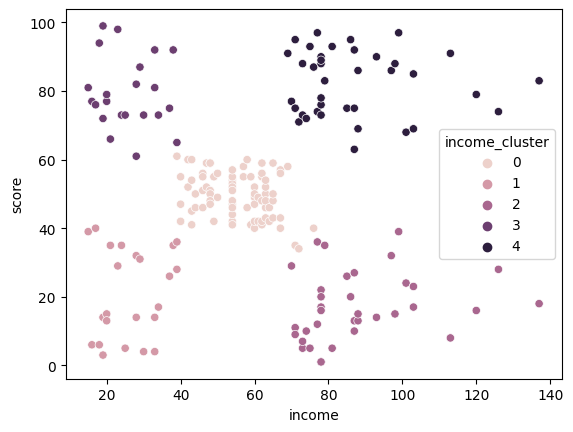

In [14]:
sns.scatterplot(x='income', y='score', hue = 'income_cluster', data = df)

In [17]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans = kmeans.fit(df[['age', 'score']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
kmeans.cluster_centers_

array([[46.16521739, 32.88695652],
       [28.95294118, 73.62352941]])

In [21]:
df['age_clusters'] = kmeans.labels_

In [22]:
df

,CustomerID,gender,age,income,score,income_cluster,age_clusters
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,3,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,3,1
4,5,Female,31,17,40,1,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,4,1
196,197,Female,45,126,28,2,0
197,198,Male,32,126,74,4,1
198,199,Male,32,137,18,2,0


In [23]:
df['age_clusters'].value_counts()

0    115
1     85
Name: age_clusters, dtype: int64

<Axes: xlabel='age', ylabel='score'>

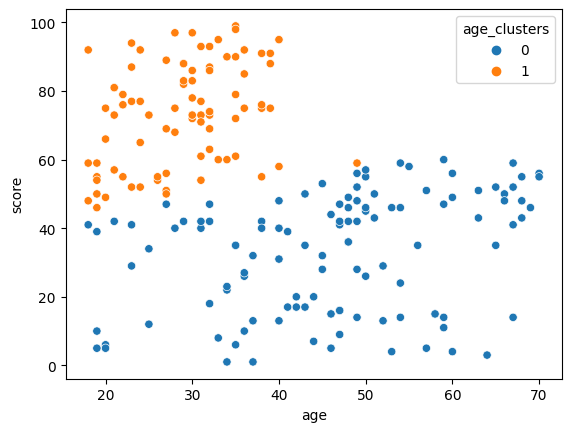

In [24]:
sns.scatterplot(x = 'age', y = 'score', hue = 'age_clusters', data = df)